In [ ]:
%%capture
!pip install langchain
!pip install langchain-openai

In [ ]:
%%capture
!pip install unstructured==0.11.2 unstructured-inference==0.7.15 pydantic lxml
!pip uninstall pdfminer.six --y
!pip install pikepdf pypdf wrapt pdfminer.six
!pip install unstructured_pytesseract
!apt-get install poppler-utils
!apt-get install tesseract-ocr

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser

In [ ]:
import openai
import os
from google.colab import userdata

OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY
openai.api_key = os.environ["OPENAI_API_KEY"]

In [ ]:
prompt_text = """You are an assistant tasked with summarizing tables and text. \
Give a concise summary of the table or text. Table or text chunk: {element} """
prompt = ChatPromptTemplate.from_template(prompt_text)

# Summary chain
model = ChatOpenAI(temperature=0, model="gpt-4")
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [ ]:
import urllib.request

url = "https://www.fsca.co.za/Regulatory%20Frameworks/FinTechDocuments/Digital%20Banking%20Research%20Document.pdf"
filename = "digital_banking.pdf"
urllib.request.urlretrieve(url, filename)

('digital_banking.pdf', <http.client.HTTPMessage at 0x7aba2b0536d0>)

In [ ]:
from unstructured.partition.pdf import partition_pdf

path = "/content/"

# Extract images, tables, and chunk text
raw_pdf_elements = partition_pdf(
    filename=path + "digital_banking.pdf",
    extract_images_in_pdf=True,
    infer_table_structure=True,
    chunking_strategy="by_title",
    max_characters=4000,
    new_after_n_chars=3800,
    combine_text_under_n_chars=2000,
    image_output_dir_path=path,
)

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Categorize by type
tables = []
texts = []
for element in raw_pdf_elements:
    if "unstructured.documents.elements.Table" in str(type(element)):
        tables.append(str(element))
    elif "unstructured.documents.elements.CompositeElement" in str(type(element)):
        texts.append(str(element))

In [ ]:
len(tables), len(texts)

(2, 16)

In [ ]:
tables

['0. Low 1. Basic 2. Good 3. Best-in-class 1. Digital Marketing 2. Automation and personalisation of customer journey to segment of one Customer Experience 3. Digital channels offerings 4. Leveraging technology to promote remote banking 5. Impact of digitization of customers facing processes on customer experience 6. Innovating and leveraging AI technology/Big Data to enhance customer value propositions Digital Products 7. leveraging APIs technology to drive partnerships between organization and Fintechs 8. Innovating/incubating products and services leveraging technology 9. leveraging of data to offer personalized customer value propositions 10. Investment in digitised operations (i.e., Robotics Process Automation/ Intelligent Automation) Operations & Technology 11. Leveraging technology to reduce the costs and time associated with serving banking customers 12. Investment in a technology stack that enables the roll out of digitized and data led propositions. 13. Investment in talent a

In [ ]:
texts

['www.fsca.co.za \n\n1 2 0 2  DIGITAL BANKING RESEARCH DOCUMENT    \n\nCONTENT\n\n06\n\n01\n\n09\n\nKEY FINDINGS\n\nDIGITISING PRODUCTS AND SERVICES\n\nEXECUTIVE SUMMARY\n\n02\n\n17\n\n09\n\nINTRODUCTION\n\nDIGITISING OPERATIONS AND TECHNOLOGY\n\n02\n\n10\n\nWHAT IS DIGITAL BANKING\n\nDIGITISE THE ORGANISATION\n\n02\n\n11\n\nTYPES OF DIGITAL BANKS\n\nSURVEY RESULTS\n\n12\n\n05\n\nDIGITISING OF THE CUSTOMER EXPERIENCE\n\nTECHNOLOGIES POWERING DIGITAL BANKS\n\n13\n\n06\n\nDIGITISING OF PRODUCTS AND SERVICES\n\nDIGITAL BANKING TRENDS\n\n14\n\n08\n\nDIGITISING OF OPERATIONS AND TECHNOLOGY\n\nDIGITAL BANKING EMERGING BEST PRACTICES\n\n15\n\n08\n\nDIGITISING OF ORGANISATION\n\nDIGITISE CUSTOMER EXPERIENCE\n\nIMPLICATIONS FOR\n\nTHE FINANCIAL\n\nSECTOR\n\nEXECUTIVE SUMMARY\n\nDigital banking entails the digitisation of traditional banking services in order to deliver financial services to customers. This entails digitisation of marketing, customer onboarding, service channels, processes, prod

In [ ]:
prompt_text = """You are an assistant tasked with summarizing tables and text. \
Give a concise summary of the table or text. Table or text chunk: {element} """
prompt = ChatPromptTemplate.from_template(prompt_text)

# Summary chain
model = ChatOpenAI(temperature=0, model="gpt-4")
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [ ]:
text_summaries = summarize_chain.batch(texts, {"max_concurrenct": 5})
table_summaries = summarize_chain.batch(tables, {"max_concurrency": 5})

In [ ]:
text_summaries

['The Digital Banking Research Document from the Financial Sector Conduct Authority of South Africa discusses the digitization of traditional banking services. It covers the technologies powering digital banks, such as Big Data, AI, cloud computing, and more. The document identifies five types of digital banks and predicts a growth in digital banking usage. It also outlines best practices in the sector, such as digitizing customer journeys and offering a range of services. A survey conducted in South Africa revealed benefits of digital banking like financial inclusion and convenience, but also highlighted drawbacks like cybersecurity and data privacy concerns. The document suggests focusing on consumer education, data management, and cybersecurity to maximize benefits and minimize risks.',
 'Digital banking refers to the digitization of traditional banking services, including marketing, customer onboarding, service channels, and various financial products. There are five types of digit

In [ ]:
table_summaries

['The text discusses various aspects of digital transformation in banking. It covers four main areas: Customer Experience, Digital Products, Operations & Technology, and Organisation. \n\nIn Customer Experience, it talks about digital marketing, automation, personalisation, digital channel offerings, remote banking, and the impact of digitization on customer experience. \n\nIn Digital Products, it discusses leveraging APIs for partnerships, innovating products and services using technology, personalizing customer value propositions using data, and investing in digitized operations. \n\nIn Operations & Technology, it highlights the use of technology to reduce costs and time, investment in technology stack for digitized and data-led propositions, investment in talent and skills for digital products, and organizational structure for digital banking execution. \n\nIn Organisation, it emphasizes the need for a mindset and behavioral change for agile, responsive, iterative, and collaborative

In [ ]:
import io
import os
import base64
import numpy as np
from PIL import Image
from langchain.chat_models import ChatOpenAI
from langchain.schema.messages import HumanMessage, SystemMessage

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

def image_summarize(img_base64,prompt):
    ''' Image summary '''
    chat = ChatOpenAI(model="gpt-4-vision-preview",
                      max_tokens=1024)

    msg = chat.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text":prompt},
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{img_base64}"
                        },
                    },
                ]
            )
        ]
    )
    return msg.content

# Store base64 encoded images
img_base64_list = []

# Store image summaries
image_summaries = []

# Prompt
prompt = "DESCRIBE the image in detail. Be specific about graphs, such as bar plots, pie charts, line graphs etc."

# Read images, encode to base64 strings
for img_file in sorted(os.listdir(path)):
    if img_file.endswith('.jpg'):
        img_path = os.path.join(path, img_file)
        base64_image = encode_image(img_path)
        img_base64_list.append(base64_image)
        image_summaries.append(image_summarize(base64_image,prompt))

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


In [ ]:
len(img_base64_list)

45

In [ ]:
len(image_summaries)

45

In [ ]:
image_summaries

['The image you\'ve provided appears to be a very simple slide or graphic with a dark background. In the center of the image, there is a URL written in light text that reads "www.fsca.co.za". The color of the text contrasts with the background, making it stand out. There are no other discernible features, such as graphs, pictures, or additional text. The bottom of the image has a thin, horizontal orange line that spans the width of the image, adding a small pop of color to the otherwise monochrome slide.',
 'The image appears to be the cover of a report or document, with the title "DIGITAL BANKING RESEARCH DOCUMENT" prominently displayed in white and orange text on a dark background, towards the bottom left corner. The year "2021" is also visible in orange, indicating the document may pertain to that year.\n\nThe photograph occupying most of the cover features the hands of a person engaging in an online transaction. The person\'s right hand is holding a blue credit card, with the card 

In [ ]:
from IPython.display import display, HTML

def plt_img_base64(img_base64):

    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    display(HTML(image_html))


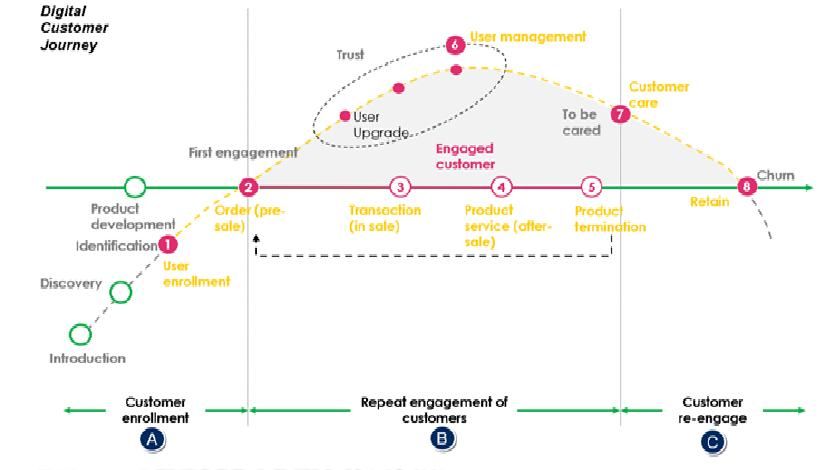

In [ ]:
plt_img_base64(img_base64_list[3])

In [ ]:
!pip install chromadb

In [ ]:
import uuid
from langchain.vectorstores import Chroma
from langchain.storage import InMemoryStore
from langchain.schema.document import Document
from langchain.embeddings import OpenAIEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever

# The vectorstore to use to index the child chunks
vectorstore = Chroma(collection_name="multi_modal_rag",
                     embedding_function=OpenAIEmbeddings())

# The storage layer for the parent documents
store = InMemoryStore()
id_key = "doc_id"

# The retriever (empty to start)
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key,
)

In [ ]:
# Add texts
doc_ids = [str(uuid.uuid4()) for _ in texts]
summary_texts = [
    Document(page_content=s, metadata={id_key: doc_ids[i]})
    for i, s in enumerate(text_summaries)
]
retriever.vectorstore.add_documents(summary_texts)
retriever.docstore.mset(list(zip(doc_ids, texts)))

# Add tables
table_ids = [str(uuid.uuid4()) for _ in tables]
summary_tables = [
    Document(page_content=s, metadata={id_key: table_ids[i]})
    for i, s in enumerate(table_summaries)
]
retriever.vectorstore.add_documents(summary_tables)
retriever.docstore.mset(list(zip(table_ids, tables)))

In [ ]:
len(doc_ids), len(summary_texts)

(16, 16)

In [ ]:
len(table_ids), len(summary_tables)

(2, 2)

In [ ]:
# Add image summaries
img_ids = [str(uuid.uuid4()) for _ in img_base64_list]
summary_img = [
    Document(page_content=s, metadata={id_key: img_ids[i]})
    for i, s in enumerate(image_summaries)
]
retriever.vectorstore.add_documents(summary_img)
retriever.docstore.mset(list(zip(img_ids, img_base64_list)))

In [ ]:
len(img_ids), len(summary_img)

(45, 45)

In [ ]:
# Retrieve
docs = retriever.get_relevant_documents(
    "What is the market size of Digital banking in retail segment of North America ?"
)

In [ ]:
len(docs)

4


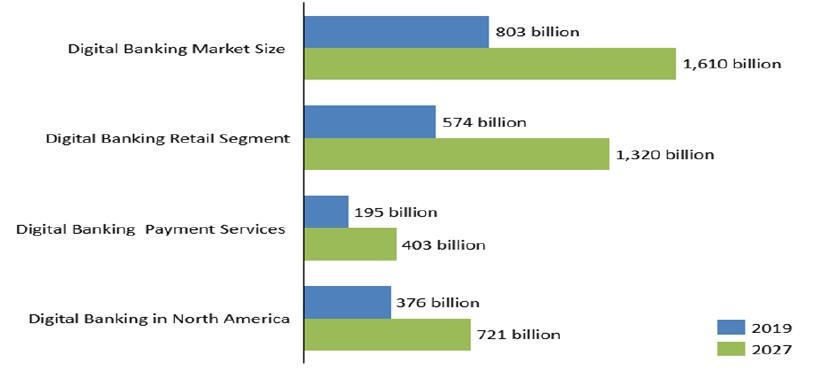

In [ ]:
from base64 import b64decode
def split_image_text_types(docs):
    ''' Split base64-encoded images and texts '''
    b64 = []
    text = []
    for doc in docs:
        try:
            b64decode(doc)
            b64.append(doc)
        except Exception as e:
            text.append(doc)
    return {
        "images": b64,
        "texts": text
    }
docs_by_type = split_image_text_types(docs)
plt_img_base64(docs_by_type["images"][0])

In [ ]:
len(docs_by_type["texts"])

3

In [ ]:
len(docs_by_type["images"])

1

In [ ]:
docs_by_type["texts"]

['Digital banking trends\n\nConsumer use of digital banking has entered a stage of acceleration globally, fuelled largely by fintech innovations and a growth in digital usage. According to a 2021 McKinsey report on digital banking, nearly nine in ten consumers across the emerging and developed markets are using digital banking actively and most of them are open to purchasing more banking services through digital channels.\n\nFigure 1: Global digital banking market size, leading segment, services and region in US dollars\n\n803 billion Digital Banking Market Size 1,610 billion Digital Banking Retail Segment 1,320 billion Digital Banking Payment Services 403 billion 376 billion 721 billion M2019 Ml 2027 Digital Banking in North America\n\nSource: Digital Banking Market Report 2021\n\nThe global digital banking market size was valued at $803.8 billion in 2019 and is projected to reach $1610 billion by 2027. Retail banking segment commands the largest share in the digital banking market wi

In [ ]:
docs_by_type["images"]

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAFyA0IDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACsrxNez6b4W1W+tmCz29pLLGxGQGVSRxWrWF40/5EbXv+vCf/wBANAGlpU8l1o9jcSnMkt

In [ ]:
from operator import itemgetter
from langchain.schema.runnable import RunnablePassthrough, RunnableLambda

def prompt_func(dict):
    format_texts = "\n".join(dict["context"]["texts"])
    return [
        HumanMessage(
            content=[
                {"type": "text", "text": f"""Answer the question based only on the following context, which can include text, tables, and the below image:
Question: {dict["question"]}

Text and tables:
{format_texts}
"""},
                {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{dict['context']['images'][0]}"}},
            ]
        )
    ]

model = ChatOpenAI(temperature=0, model="gpt-4-vision-preview", max_tokens=1024)

# RAG pipeline
chain = (
    {"context": retriever | RunnableLambda(split_image_text_types), "question": RunnablePassthrough()}
    | RunnableLambda(prompt_func)
    | model
    | StrOutputParser()
)

In [ ]:
chain.invoke(
    "What is the market size of Digital banking in PAYMENT SERVICES of North America ?"
)

'The market size of digital banking in payment services of North America is projected to be $403 billion by 2027.'

In [ ]:
chain.invoke(
    "How was the market size of digital banking in payment services till 2017 ?"
)

'The market size of digital banking in payment services till 2017 is not explicitly provided in the given context. The information starts from the year 2019, where the digital payment segment in the digital banking market was valued at $194.5 billion.'